# MATH 210 Introduction to Mathematical Computing

## October 26, 2020

* Riemann sums and error formulas
* Trapezoid rule and error formula
* `scipy.integrate`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Riemann sums

The **right Riemann sum** for $f(x)$ over $[a,b]$ with $N$ subintervals is

$$
R_N(f) = \sum_{n = 1}^N f(x_n) \Delta x
$$

where $\Delta x = (b - a)/N$ and $x_n = a + n \Delta x$.

The **left Riemann sum** for $f(x)$ over $[a,b]$ with $N$ subintervals is

$$
L_N(f) = \sum_{n = 1}^N f(x_{n-1}) \Delta x
$$

The **midpoint Riemann sum** for $f(x)$ over $[a,b]$ with $N$ subintervals is

$$
M_N(f) = \sum_{n = 1}^N f((x_{n-1} + x_n)/2) \Delta x
$$

### Example

$$
\int_0^1 e^{-x^2} dx
$$

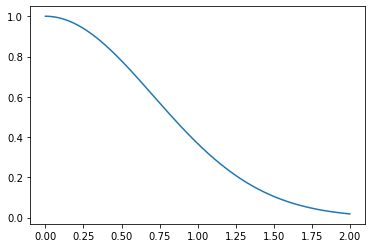

In [2]:
x = np.linspace(0,2,200)
y = np.exp(-x**2)
plt.plot(x,y)
plt.show()

From last class, we need $N \geq 429$ such that $E_N^R(f) < 0.001$ (and also $E_N^L(f) < 0.001$).

But first let's look at how to create and slices arrays of $x$ value to get left and right endpoints.

In [3]:
N = 5
a = 0
b = 1
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
x_right = x[1:]
x_left = x[:N]
x_midpoint = (x_right + x_left)/2

In [4]:
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [5]:
x_right

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [6]:
x_left

array([0. , 0.2, 0.4, 0.6, 0.8])

In [7]:
x_midpoint

array([0.1, 0.3, 0.5, 0.7, 0.9])

Now compute the approximations for $N=429$.

In [8]:
N = 429
a = 0
b = 1
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
x_right = x[1:]
x_left = x[:N]
x_midpoint = (x_right + x_left)/2
R = np.sum(np.exp(-x_right**2))*dx
L = np.sum(np.exp(-x_left**2))*dx
M = np.sum(np.exp(-x_midpoint**2))*dx
print("Right Riemann sum:", R)
print("Midpoint Riemann sum:", M)
print("Left Riemann sum:", L)

Right Riemann sum: 0.7460870624144178
Midpoint Riemann sum: 0.7468242993874284
Left Riemann sum: 0.7475605369105216


Why is $R_N(f) < M_N(f) < L_N(f)$? Because $f(x) = e^{-x^2}$ is decreasing on $[0,1]$.

Also from last class, we need only $N \geq 10$ for $E_N^M(f) < 0.001$. The approximation with $N=429$ above gives a much smaller error:

In [9]:
K2 = 2
E = (b - a)**3/(24*N**2)*K2
print("N =",N)
print("Midpoint Riemann sum error:", E)

N = 429
Midpoint Riemann sum error: 4.5279765559485837e-07


## Trapezoid rule

The **trapezoid rule** for $f(x)$ over $[a,b]$ with $N$ subintervals is

$$
T_N(f) = \sum_{n = 1}^N \frac{f(x_{n-1}) + f(x_n)}{2} \Delta x = \frac{R_N(f) + L_N(f)}{2}
$$

Now let's try the trapezoid rule. We saw last time that $N \geq 13$ then $E_N^T(f) < 0.001$.

In [10]:
N = 13
a = 0
b = 1
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
x_right = x[1:]
x_left = x[:N]
T = (np.sum(np.exp(-x_right**2)) + np.sum(np.exp(-x_left**2)))*dx/2
print("Trapezoid rule:", T)

Trapezoid rule: 0.7464612610366896


## Infinite Gaussian integral

Let's look at the infinite integral
$$
\int_0^{\infty} e^{-x^2} dx = \frac{\sqrt{\pi}}{2}
$$

Let's approximate the infinite integral using the trapezoid rule on the interval $[0,10]$ with $N=1000$.

In [11]:
N = 1000
a = 0
b = 10
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
x_right = x[1:]
x_left = x[:N]
T = (np.sum(np.exp(-x_right**2)) + np.sum(np.exp(-x_left**2)))*dx/2
print("Trapezoid rule:", T)

Trapezoid rule: 0.8862269254527582


In [12]:
np.sqrt(np.pi)/2

0.8862269254527579

## scipy.integrate

The subpackage `scipy.integrate` has many functions for approximating integrals.

In [13]:
import scipy.integrate as spi

In [14]:
spi.trapz?

In [15]:
N = 13
a = 0
b = 1
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
x_right = x[1:]
x_left = x[:N]
T = (np.sum(np.exp(-x_right**2)) + np.sum(np.exp(-x_left**2)))*dx/2
print(T)

0.7464612610366896


In [16]:
N = 13
a = 0
b = 1
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
y = np.exp(-x**2)
T = spi.trapz(y,x)
print(T)

0.7464612610366896


## Example

Approximate the integral

$$
\int_1^2 x^x dx
$$

using the trapezoid rule with error less than 0.0001.

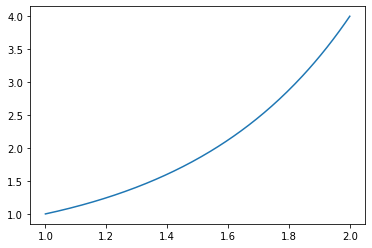

In [17]:
x = np.linspace(1,2,200)
y = x**x
plt.plot(x,y)
plt.show()

The error formula is

$$
E_N^T(f) \leq \frac{(b - a)^3}{12 N^2} K_2
$$

where $|f''(x)| \leq K_2$ for $x \in [a,b]$.

We have

$$
f'(x) = x^x ( \log(x) + 1)
$$

$$
f''(x) = x^x ( \log(x) + 1)^2 + x^{x-1}
$$

Plot $f''(x)$ and find a bound $K_2$.

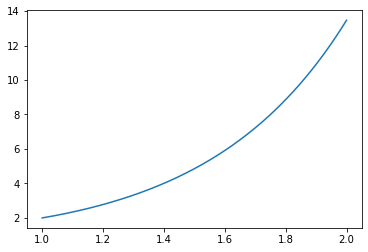

In [18]:
x = np.linspace(1,2,200)
d2f = x**x*(np.log(x) + 1)**2 + x**(x - 1)
plt.plot(x,d2f)
plt.show()

In [19]:
K2 = 2**2*(np.log(2) + 1)**2 + 2**(2 - 1)
K2

13.46698950015237

In [20]:
N = np.sqrt(K2/12/0.0001)
N

105.93626031782968

In [21]:
N = 106
a = 1
b = 2
dx = (b - a)/N
x = np.linspace(a,b,N + 1)
y = x**x
I = spi.trapz(y,x)
print(I)

2.0504890474484894
